# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/all.csv
- https://github.com/cs109/2015lab1/blob/master/hamlet.txt

We are going to go through the *Lab1-babypython.ipynb* and *Lab1-pythonpandas.ipynb*. The orginal Python notebooks were written in Python 2. We converted the notebooks into Python 3, which can be downloaded from here"

- https://github.com/cis3715-temple-2020/cis3715-temple-2020.github.io/blob/master/Lab3/CIS3715-Lab3.A-babypython_py3.ipynb
- https://github.com/cis3715-temple-2020/cis3715-temple-2020.github.io/blob/master/Lab3/CIS3715-Lab3.A-pythonpandas_py3.ipynb

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*.



**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [1]:
## all imports
from IPython.display import HTML
import numpy as np
import requests
import bs4 # beautiful soup
import time
import operator
import socket
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the user data:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']    # pass in column names for each CSV

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols, engine='python')

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols, engine='python')

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# Read the movies data
# The movies file contains columns indicating the movie's genres
# Let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), engine='python', encoding = "ISO-8859-1")

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [5]:
print(movies.dtypes)
print()
print(movies.describe())

#Scott's experimentation
print((movies.loc[:, 'movie_id':'release_date']).describe())
print(np.sum(movies['release_date'].isnull()))
moviesCleanCopy = movies.copy(deep=True)
moviesCleanCopy = moviesCleanCopy[moviesCleanCopy['release_date'].notnull()]
moviesCleanCopy["release_date"] = pd.to_datetime(moviesCleanCopy["release_date"])
moviesCleanCopy["release_date"] = moviesCleanCopy["release_date"].astype(np.int64)

print(moviesCleanCopy.dtypes)
print(moviesCleanCopy.describe())
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN
          movie_id
count  1682.000000
mean    841.500000
std     485.695893
min       1.000000
25%     421.250000
50%     841.500000
75%    1261.750000
max    1682.000000
1
movie_id                int64
title                  object
release_date            int64
video_release_date    float64
imdb_url               object
dtype: object
          movie_id  release_date  video_release_date
count  1681.000000  1.681000e+03                 0.0
mean    841.841761  6.165968e+17         

Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [6]:
print(users.head())
print('\n')
print(users['occupation'].head())
print('\n')
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())
print('\n')
print(users.iloc[3])

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object


   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [7]:
# Extract data within a range
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [8]:
## users aged 40 AND male
# your code here
oldGuys= users[ (users["age"] > 40) & (users["sex"] == "M")]
print(oldGuys.head())

## users who are female and programmers
# your code here
femaleProgrammers= users[ (users["sex"] == "F") & (users["occupation"] == "programmer")]
femaleProgrammers.head()

## show statistic summary or compute mean
# your code here
print("\nAverage age of female programmers: " + str(np.mean(femaleProgrammers["age"])))

    user_id  age sex     occupation zip_code
5         6   42   M      executive    98101
6         7   57   M  administrator    91344
9        10   53   M         lawyer    90703
12       13   47   M       educator    29206
13       14   45   M      scientist    55106

Average age of female programmers: 32.166666666666664


Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [9]:
print(ratings.head())
## split data per user ID
grouped_data = ratings.groupby('user_id')

## count and combine
ratings_per_user = grouped_data.count()

print(ratings_per_user.head(5))

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
         movie_id  rating  unix_timestamp
user_id                                  
1             272     272             272
2              62      62              62
3              54      54              54
4              24      24              24
5             175     175             175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [10]:
## split data per movie
# your code here
ratings["rating"] = ratings["rating"].astype(float)

ratingsByMovie = ratings.groupby('movie_id')

## average and combine
# your code here
avgMovieRatings=  (ratingsByMovie["rating"]).mean()
print("Average movie ratings:")
print(avgMovieRatings)

## get the maximum rating
# your code here
print("Highest average rating any movie got:")
highestMovieRating = avgMovieRatings.max()
print(highestMovieRating)

## get movie ids with that rating
# your code here
highestRatedMovieIds = (avgMovieRatings[ avgMovieRatings >= highestMovieRating]).index.to_list()

print("Good movie ids: ", highestRatedMovieIds)
## get the movie title
# your code here
highestRatedMovieTitles = (movies.loc[highestRatedMovieIds, "title"]).to_list()


print("Best movie titles ", highestRatedMovieTitles)
## get number of ratings per movie
# your code here
highestRatedMovieRatingCounts =  (ratingsByMovie["rating"].count())[highestRatedMovieIds]

print("Number of ratings per movie: ", highestRatedMovieRatingCounts)


Average movie ratings:
movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64
Highest average rating any movie got:
5.0
Good movie ids:  [814, 1122, 1189, 1201, 1293, 1467, 1500, 1536, 1599, 1653]
Best movie titles  ['One Fine Day (1996)', 'Last Time I Saw Paris, The (1954)', 'That Old Feeling (1997)', 'Maybe, Maybe Not (Bewegte Mann, Der) (1994)', 'Ayn Rand: A Sense of Life (1997)', 'Cure, The (1995)', 'Prisoner of the Mountains (Kavkazsky Plennik) (1996)', 'Cosi (1996)', 'Guantanamera (1994)', 'Chairman of the Board (1998)']
Number of ratings per movie:  movie_id
814     1
1122    1
1189    3
1201    1
1293    3
1467    2
1500    2
1536    1
1599    1
1653    1
Name: rating, dtype: int64


**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [11]:
## get the average rating per user
# your code here
ratingsByUser = ratings.groupby("user_id")
avgRatingPerUser = ratingsByUser["rating"].mean()
print(avgRatingPerUser)

# list all occupations and if they are male or female dominant
# your code here

totalCtColName = "Total Count"
maleCtColName = "Male Count"
femaleCtColName = "Female Count"
primarySexColName = "Primary Sex"

occupations = users["occupation"].unique()
numOccupations = occupations.size
occDf = pd.DataFrame(data=occupations, columns=["occupation"])
occDf.insert(1, primarySexColName, [""] * numOccupations)
occDf.insert(2, femaleCtColName, [0] * numOccupations)
occDf.insert(3, maleCtColName, [0] * numOccupations)
occDf.insert(4, totalCtColName, [0] * numOccupations)
occDf.set_index("occupation", inplace=True)

for userIndex, user in users.iterrows():
    occDf.loc[user["occupation"], totalCtColName] += 1
    countCol = None
    # print(user)
    if user["sex"] == "M":
        countCol = maleCtColName
    elif user["sex"] == "F":
        countCol = femaleCtColName
    if countCol is not None:
        occDf.loc[user["occupation"], countCol] += 1 

for occupation in occupations:
    if occDf.loc[occupation, femaleCtColName] > occDf.loc[occupation, maleCtColName]:
        occDf.loc[occupation, primarySexColName] = "Female"
    elif occDf.loc[occupation, femaleCtColName] < occDf.loc[occupation, maleCtColName]:
        occDf.loc[occupation, primarySexColName] = "Male"
    else:
        occDf.loc[occupation, primarySexColName] = "Neither"

print()
print(occDf)
print()



print('number of male users: ')
print(sum(users['sex'] == 'M'))

print('number of female users: ')
print(sum(users['sex'] == 'F'))

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Length: 943, dtype: float64

              Primary Sex  Female Count  Male Count  Total Count
occupation                                                      
technician           Male             1          26           27
other                Male            36          69          105
writer               Male            19          26           45
executive            Male             3          29           32
administrator        Male            36          43           79
student              Male            60         136          196
lawyer               Male             2          10           12
educator             Male            26          69           95
scientist            Male             3          28           31
entertainment        Male             2          16       

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

3.52986 4.0


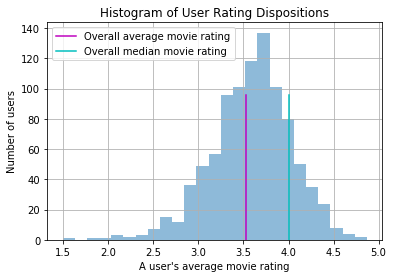

In [12]:
overallAverageRating = ratings["rating"].mean()
overallMedianRating= ratings["rating"].median()
print(overallAverageRating, overallMedianRating)

avgRatingPerUser.hist(bins=25, alpha=0.5)
plt.xlabel("A user's average movie rating")
plt.ylabel("Number of users")
plt.title("Histogram of User Rating Dispositions")

plt.axvline(overallAverageRating, 0, 0.666666, color='m', label="Overall average movie rating")
plt.axvline(overallMedianRating, 0, 0.666666, color='c', label="Overall median movie rating")
plt.legend()

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: rating, Length: 943, dtype: int64


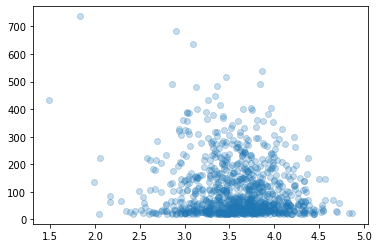

In [13]:
ratingsCountPerUser = ratingsByUser["rating"].count()
print(ratingsCountPerUser)

plt.scatter(avgRatingPerUser, ratingsCountPerUser, alpha=0.25)


## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


Below is an example for a minimal webpage defined in HTML tags. The root tag is 'html' and then you have the 'head' tag. This part of the page typically includes the title of the page and might also have other meta information like the author or keywords that are important for search engines. The 'body' tag marks the actual content of the page. You can play around with the 'h2' tag trying different header levels. They range from 1 to 6. 

In [14]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h6> Test </h6>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [44]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = requests.get(url).text
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>		   

<img align="right" src="10.1.jpg" width="250"><br />

<p>[

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [45]:
## your code here
## is 'Alice' in source?
alicePresent = source.find("Alice") != -1
print("Alice is ", ("" if alicePresent else "not "), "referenced on the beautiful soup homepage.")

## count occurences of 'Soup'
soupWordFreq = source.count("Soup")
print("The word 'Soup' occurs ", soupWordFreq, " times on the page.")

## find index of 'alien video games'
alienVideoGamesIndex = source.find("alien video games")
print("The first occurrence of the phrase 'alien video games' starts with the ", alienVideoGamesIndex, "th character of the webpage's HTML.")

Alice is  not  referenced on the beautiful soup homepage.
The word 'Soup' occurs  49  times on the page.
The first occurrence of the phrase 'alien video games' starts with the  -1 th character of the webpage's HTML.


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [46]:
## get bs4 object
soup = bs4.BeautifulSoup(source)
 
## compare the two print statements
# print(soup)
# print(soup.prettify())

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
soup.findAll('Soup')
listItemWebElements = soup.findAll("li")
print(listItemWebElements)

[<li>Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

<li>Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup can't detect one. Then you just have to specify the
original encoding.

<li>Beautiful Soup sits on top of popular Python parsers like <a href="http://lxml.de/">lxml</a> and <a href="http://code.google.com/p/html5lib/">html5lib</a>, allowing you
to try out different parsing strategies or trade speed for
flexibility.

</li></li></li>, <li>Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful So

More examples:

In [47]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, 
## not all tags in the string
first_tag = soup.find('a')
print(first_tag)

## get attribute `href`
print(first_tag.get('href'))

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
print(link_list)

<a href="#Download">Download</a>
#Download
['#Download', 'bs4/doc/', '#HallOfFame', 'enterprise.html', 'https://code.launchpad.net/beautifulsoup', 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'zine/', 'bs4/download/', 'http://lxml.de/', 'http://code.google.com/p/html5lib/', 'bs4/doc/', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise', 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup', 'https://bugs.launchpad.net/beautifulsoup/', 'https://tidelift.com/security', 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website', 'zine/', None, 'bs4/download/', 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html', 'download/3.x/BeautifulSoup-3.2.2.tar.gz', 'https://tidelift.com/subscription/pkg/pypi-be

In [48]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object is not subscriptable

In [49]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements! Let's verify:
print(sum([l is None for l in link_list]))

# So there are two elements in the list that are None!

2


In [50]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [51]:
# we can put this in a list comprehension as well, 
# it almost reads like a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f

Parsing the Tree:

In [52]:
# redefining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [70]:
## your code here
## get h3 tag from body
mediumHeaderElem = body.find("h3")
print(mediumHeaderElem)

## use ul as entry point
soupSiteCode = bs4.BeautifulSoup(source)
hallOfFameContainer = soupSiteCode.find("ul")

## get hall of fame list from entry point
## skip the first entry 
hallOfFameEntries = hallOfFameContainer.find_all("li")[1:]

## reformat into a list containing strings
## it is ok to have a list of lists
hallOfFameEntries = [str(entryElem.contents) for entryElem in hallOfFameEntries]
print(hallOfFameEntries) #, sep="\n\n")

<h3> Test </h3>
['[\'Reddit uses Beautiful Soup to \', <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse\na page that\'s been linked to and find a representative image</a>, \'.\\n\\n\', <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business\n activities</a> of an arms merchant.\n\n<li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python\nbug tracker from Sourceforge to Roundup</a>.\n\n<li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>\nuses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather\nstatewide election results</a>.\n\n<li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA\'s Forecast\nApplications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for\ndownloading "hi

`hallOfFameEntries` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [71]:
test =  ["".join(str(a) for a in sublist) for sublist in hallOfFameEntries]
print('\n'.join(test))

['Reddit uses Beautiful Soup to ', <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>, '.\n\n', <li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

<li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

<li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

<li>The <a href="http://esrl.noaa.gov/gsd/fab/">NOAA's Forecast
Applications Branch</a> uses Beautiful Soup in <a href="http://laps.noaa.gov/topograbber/">TopoGrabber</a>, a script for
downloading "high resolution USGS datasets."

</li></l

**Question 7**:
- Explain in detail what is Python doing in the previous line
In the first line, it's going through the list of lists of strings which made up the hall of fame entries and uniting each list of strings together  (technically, it's inserting an-empty string between each substring) so that each list of strings (which corresponded to a single hall of fame entry) is condensed into a single string for that hall of fame entry.
That way, the variable test becomes a simple list of strings, where each string contains one of the hall of fame entries.

In the second line, the join() function combines all of the strings for different hall of fame entries together into a single string, but adds a newline character between each hall of fame entry. It then passes that unified string to the print() function so that the hall of fame list can be displayed.  



**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

In [ ]:

# todo use HTML_output() or whatever from earlier in this doc 